### Importing relevent libraries


In [2]:
import pandas as pd
import networkx as nx
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
data = pd.read_csv("../Datasets/Marketing campaign dataset.csv")

# Select relevant features
selected_columns = [
    'campaign_item_id', 'advertiser_id', 'ext_service_name', 'creative_id', 'creative_width', 
    'creative_height', 'search_tags', 'template_id', 'channel_name', 'campaign_budget_usd', 
    'media_cost_usd', 'impressions', 'clicks', 'time', 'weekday_cat'
]

data = data[selected_columns]

# Convert time to datetime for later use
data['time'] = pd.to_datetime(data['time'])

# Encode categorical features
le = LabelEncoder()
categorical_cols = ['campaign_item_id', 'advertiser_id', 'ext_service_name', 'channel_name', 'weekday_cat', 'search_tags']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Display the processed data
print(data.head())

   campaign_item_id  advertiser_id  ext_service_name  creative_id  \
0                 0              0                 1         1000   
1                 0              0                 0         1000   
2                 0              0                 1         1000   
3                 0              0                 1         1000   
4                 0              0                 2         1000   

   creative_width  creative_height  search_tags  template_id  channel_name  \
0           300.0            250.0            2         90.0             1   
1           300.0            250.0            0         90.0             3   
2           300.0            250.0            1         90.0             3   
3           300.0            250.0            0         90.0             4   
4           300.0            250.0            0         90.0             1   

   campaign_budget_usd  media_cost_usd  impressions  clicks       time  \
0           652.173913       14.058514    

In [4]:
# Check for null values in the dataset
null_values = data.isnull().sum()

# Display columns with null values (if any)
print("Null values in each column:\n", null_values)

# To check if there are any rows with missing values in the entire dataset
print("Total rows with any missing values:", data.isnull().any(axis=1).sum())


Null values in each column:
 campaign_item_id          0
advertiser_id             0
ext_service_name          0
creative_id               0
creative_width         3412
creative_height        3412
search_tags               0
template_id            3412
channel_name              0
campaign_budget_usd       0
media_cost_usd            0
impressions               0
clicks                    0
time                      0
weekday_cat               0
dtype: int64
Total rows with any missing values: 3412


In [5]:
# Fill null values in specific columns with 0
columns_to_fill = ['creative_width', 'creative_height']
data[columns_to_fill] = data[columns_to_fill].fillna(0)

# Verify the changes
print(data[columns_to_fill].isnull().sum())  # Should show 0 for all these columns
print(data.head())  # To see the updated dataset

creative_width     0
creative_height    0
dtype: int64
   campaign_item_id  advertiser_id  ext_service_name  creative_id  \
0                 0              0                 1         1000   
1                 0              0                 0         1000   
2                 0              0                 1         1000   
3                 0              0                 1         1000   
4                 0              0                 2         1000   

   creative_width  creative_height  search_tags  template_id  channel_name  \
0           300.0            250.0            2         90.0             1   
1           300.0            250.0            0         90.0             3   
2           300.0            250.0            1         90.0             3   
3           300.0            250.0            0         90.0             4   
4           300.0            250.0            0         90.0             1   

   campaign_budget_usd  media_cost_usd  impressions  clicks  

In [ ]:
data["template_id"].describe()
data["template_id"].isnull().sum()  # Count of missing values
print(data["template_id"].unique())


[90. 23. 92. 89. 93. nan]


In [10]:
data["template_id"] = data["template_id"].fillna(data["template_id"].mean())

In [17]:
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()
# Initialize graph
G = nx.relabel_nodes(G, str)

# Adding nodes and edges
for idx, row in data.iterrows():
    # Campaign Node
    campaign_id = row['campaign_item_id']
    G.add_node(campaign_id, entity='campaign', budget=row['campaign_budget_usd'],
               media_cost=row['media_cost_usd'], impressions=row['impressions'], 
               clicks=row['clicks'], time=row['time'])
    
    # Advertiser Node
    advertiser_id = row['advertiser_id']
    G.add_node(advertiser_id, entity='advertiser')
    G.add_edge(campaign_id, advertiser_id, relationship='belongs_to')

    # Platform Node
    platform = row['ext_service_name']
    G.add_node(platform, entity='platform')
    G.add_edge(campaign_id, platform, relationship='runs_on')
    
    # Creative Node
    creative_id = row['creative_id']
    G.add_node(creative_id, entity='creative', width=row['creative_width'], height=row['creative_height'])
    G.add_edge(campaign_id, creative_id, relationship='uses')
    
    # Channel Node
    channel = row['channel_name']
    G.add_node(channel, entity='channel')
    G.add_edge(campaign_id, channel, relationship='published_in')
    
    # Day Type Node (Weekday/Weekend)
    day_type = row['weekday_cat']
    G.add_node(day_type, entity='day_type')
    G.add_edge(campaign_id, day_type, relationship='runs_on_day')


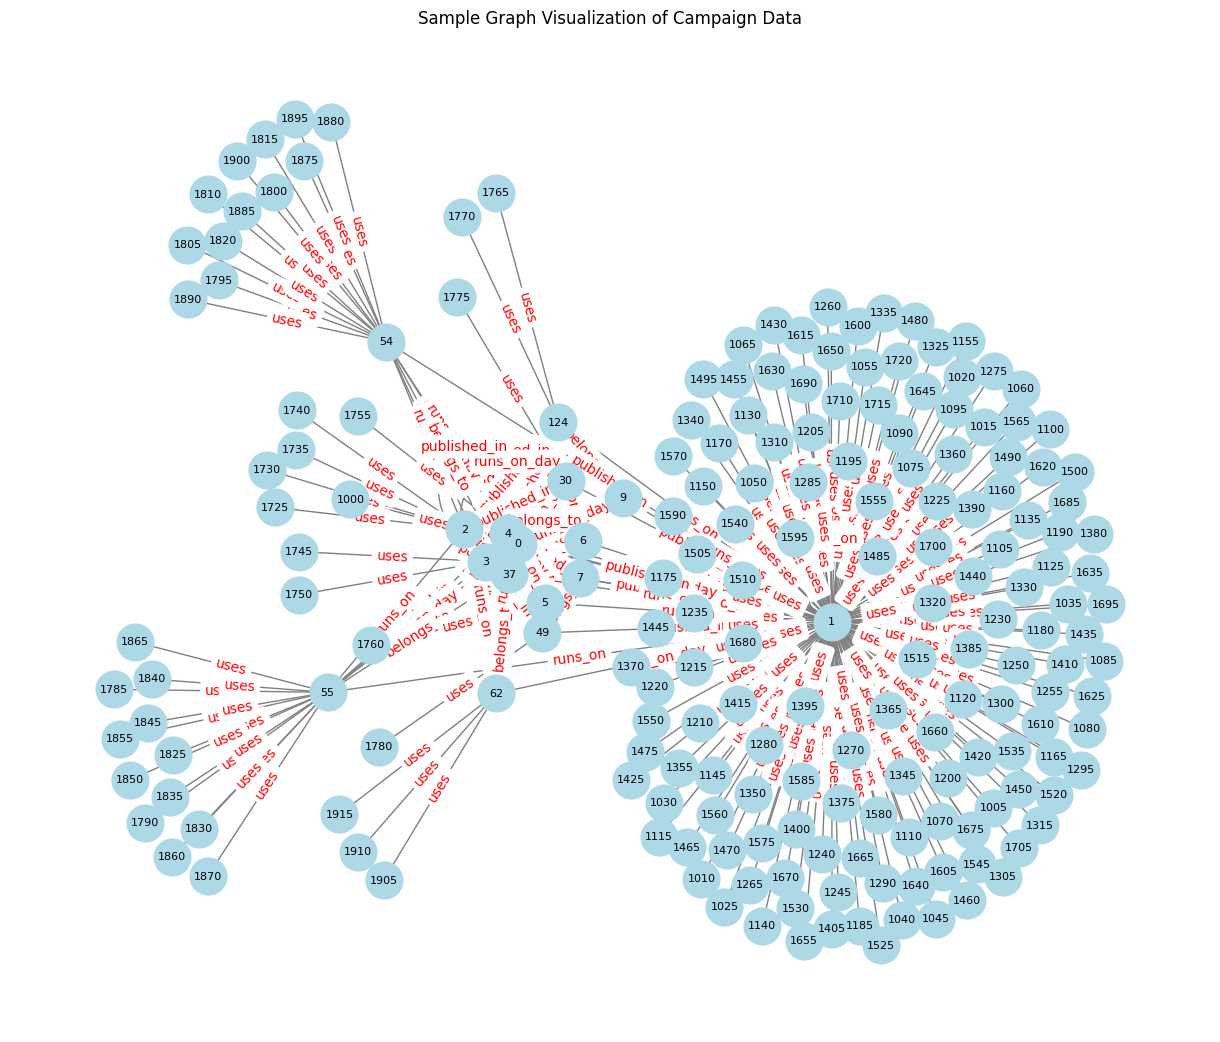

In [18]:
# Visualize the graph (showing a sample subgraph for clarity)
subgraph = G.subgraph(list(G.nodes)[:200])  # Limit visualization to 20 nodes for simplicity
pos = nx.spring_layout(subgraph, seed=42)  # Consistent layout for repeated plots
plt.figure(figsize=(12, 10))
nx.draw(subgraph, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=8, font_color="black", edge_color="gray")
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels={(u, v): d['relationship'] for u, v, d in subgraph.edges(data=True)}, font_color="red")
plt.title("Sample Graph Visualization of Campaign Data")
plt.show()

In [19]:
data[data["campaign_item_id"] == 1].value_counts()

campaign_item_id  advertiser_id  ext_service_name  creative_id  creative_width  creative_height  search_tags  template_id  channel_name  campaign_budget_usd  media_cost_usd  impressions  clicks  time        weekday_cat
1                 1              0                 1005         0.0             0.0              0            23.000000    0             760.0                9.375291        611          10      2022-06-11  0              1
                  2              1                 1405         0.0             0.0              0            23.000000    0             325.0                4.839766        885          15      2022-07-02  0              1
                                                   1365         0.0             0.0              4            23.000000    0             325.0                14.176867       1405         33      2022-06-01  0              1
                                                                                                 3           

In [25]:
data["advertiser_id"].unique()

array([ 0,  1,  2,  4,  3,  5,  9,  6,  7, 37, 40, 10, 12, 11, 13, 14, 17,
        8, 16, 32, 18, 31, 19, 27, 24, 29, 28, 25, 33, 30, 35, 39, 41, 38,
       36, 42, 45, 43, 44, 15, 34, 46, 26, 20, 23, 22, 21], dtype=int64)

In [20]:
data[data["advertiser_id"] == 1].value_counts()

campaign_item_id  advertiser_id  ext_service_name  creative_id  creative_width  creative_height  search_tags  template_id  channel_name  campaign_budget_usd  media_cost_usd  impressions  clicks  time        weekday_cat
1                 1              0                 1005         0.0             0.0              0            23.000000    0             760.0                9.375291        611          10      2022-06-11  0              1
                                 1                 1360         0.0             0.0              2            23.000000    0             760.0                7.661091        574          8       2022-07-06  0              1
                                 2                 1005         0.0             0.0              2            23.000000    3             800.0                10.708611       765          3       2022-07-25  0              1
                                                                                                 3           

In [21]:
from node2vec import Node2Vec

# Initialize Node2Vec model
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)

# Fit the model and generate embeddings
model = node2vec.fit()

# Retrieve embeddings for each ad node
ad_embeddings = {node: model.wv[node] for node in G.nodes()}

Computing transition probabilities:   0%|          | 0/6158 [00:00<?, ?it/s]

Computing transition probabilities: 100%|██████████| 6158/6158 [00:12<00:00, 509.71it/s] 


KeyError: "Key '3080' not present"

In [ ]:
# Convert embeddings to a DataFrame
embedding_df = pd.DataFrame.from_dict(ad_embeddings, orient='index')
embedding_df.columns = [f'embedding_{i}' for i in range(embedding_df.shape[1])]

# Merge embeddings with original data (keeping relevant features and target variables)
final_data = data.merge(embedding_df, left_on='creative_id', right_index=True)

# Save the preprocessed dataset for training
final_data.to_csv("preprocessed_data.csv", index=False)


In [ ]:
import networkx as nx

# Create a new empty graph
G = nx.Graph()

# Add nodes with attributes (representing ads or campaigns, for example)
G.add_node(1, channel_name='Social', impressions=1000, clicks=50)
G.add_node(2, channel_name='Search', impressions=800, clicks=30)

# Add edges to represent relationships (e.g., same advertiser or similar keywords)
G.add_edge(1, 2, relation='similar_keywords')

# Display basic information about the graph
print(nx.info(G))


AttributeError: module 'networkx' has no attribute 'info'